In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go


In [4]:
df_events = pd.read_csv("C:/Users/byeongwan/OneDrive/desktop/archive/events.csv")
df_ginf = pd.read_csv("C:/Users/byeongwan/OneDrive/desktop/archive/ginf.csv")

In [5]:
df_ginf = df_ginf[['id_odsp', 'date', 'league', 'season', 'country']]

In [7]:
df_events = df_events.merge(df_ginf, how='left')

In [8]:
df_events = df_events[df_events['season'] >= 2015]

In [9]:
leagues = {'E0': 'Premier League', 'SP1': 'La Liga',
          'I1': 'Serie A', 'F1': 'League One', 'D1': 'Bundesliga'}

In [10]:
df_events['league'] = df_events['league'].map(leagues)

In [11]:
## Events type 1
event_type_1 = pd.Series([
    'Announcement',
    'Attempt',
    'Corner',
    'Foul',
    'Yellow card',
    'Second yellow card',
    'Red card',
    'Substitution',
    'Free kick won',
    'Offside',
    'Hand ball',
    'Penalty conceded'], index=[[item for item in range(0, 12)]])

## Events type 2
event_type2 = pd.Series(['Key Pass', 'Failed through ball', 'Sending off', 'Own goal'],
                       index=[[item for item in range(12, 16)]])

## Match side
side = pd.Series(['Home', 'Away'], index=[[item for item in range(1, 3)]])

## Shot place
shot_place = pd.Series([
    'Bit too high', 
    'Blocked',
    'Bottom left corner',
    'Bottom right corner',
    'Centre of the goal',
    'High and wide',
    'Hits the bar',
    'Misses to the left',
    'Misses to the right',
    'Too high',
    'Top centre of the goal',
    'Top left corner',
    'Top right corner'
], index=[[item for item in range(1, 14)]])

## Outcome of shot
shot_outcome = pd.Series(['On target', 'Off target', 'Blocked', 'Hit the bar'],
                        index=[[item for item in range(1, 5)]])
## Location of shot
location = pd.Series([
    'Attacking half',
    'Defensive half',
    'Centre of the box',
    'Left wing',
    'Right wing',
    'Difficult angle and long range',
    'Difficult angle on the left',
    'Difficult angle on the right',
    'Left side of the box',
    'Left side of the six yard box',
    'Right side of the box',
    'Right side of the six yard box',
    'Very close range',
    'Penalty spot',
    'Outside the box',
    'Long range',
    'More than 35 yards',
    'More than 40 yards',
    'Not recorded'
], 
index=[[item for item in range(1, 20)]])

## Players' body part
bodypart = pd.Series(['right foot', 'left foot', 'head'], index=[[item for item in range(1, 4)]])

## Assist method
assist_method = pd.Series(['None', 'Pass', 'Cross', 'Headed pass', 'Through ball'],
                         index=[item for item in range(0, 5)])

## Situation
situation = pd.Series(['Open play', 'Set piece', 'Corner', 'Free kick'],
                     index=[item for item in range(1, 5)])

In [12]:
## Utility function to plot bar plots with similar configuration
def plot_barplot(data, x_ticks, x_labels, y_labels, title, color='muted', num=10, figsize=8):
    ## Set standard style as whitegrid (this also could be customized via param)
    sns.set_style("whitegrid")
    ## Set a figure with custom figsize
    plt.figure(figsize=(num, figsize))
    ## Plottin data
    ax = sns.barplot(x = [j for j in range(0, len(data))], y=data.values, palette=color)
    ## Setting ticks extracted from data indexes
    ax.set_xticks([j for j in range(0, len(data))])
    ## Set labels of the chart
    ax.set_xticklabels(x_ticks, rotation=45)
    ax.set(xlabel = x_labels, ylabel = y_labels, title = title)
    ax.plot();
    plt.tight_layout()

C:\Users\BYEONG~1\AppData\Local\Temp/ipykernel_19260/3121962416.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of ticklabels (12).

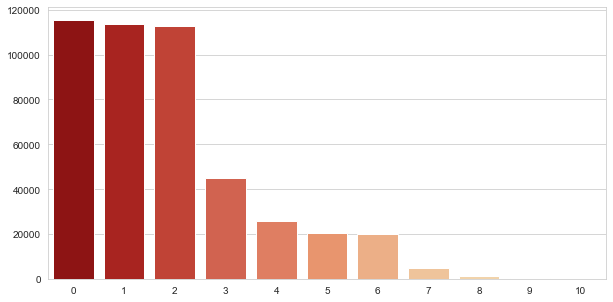

In [13]:
## Count of events occurecies
events_series = df_events['event_type'].value_counts()

## Plotting chart 
plot_barplot(events_series, event_type_1.values,
            "Event type", "Number of events", "Event types", 'OrRd_r', 10, 5)

C:\Users\BYEONG~1\AppData\Local\Temp/ipykernel_19260/3121962416.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




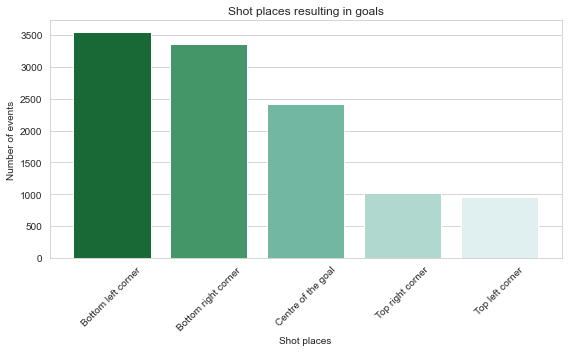

In [14]:
## Filtering out dataframe to extract attemtps which resulted in goals
df_shot_places = df_events[(df_events['event_type'] == 1) & 
                           (df_events['is_goal'] == 1)]['shot_place'].value_counts()

## Plotting the chart
plot_barplot(df_shot_places, shot_place[[3, 4, 5, 13, 12]], 'Shot places', 'Number of events',
    'Shot places resulting in goals', 'BuGn_r', 8, 5)

C:\Users\BYEONG~1\AppData\Local\Temp/ipykernel_19260/3121962416.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




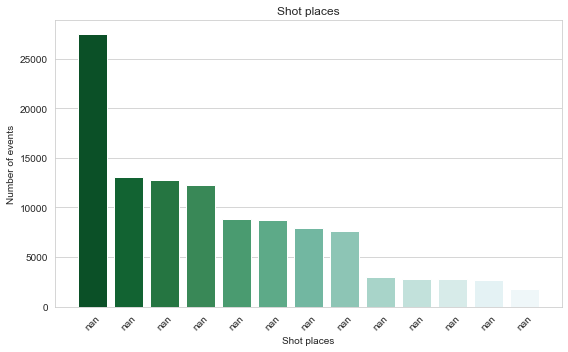

In [15]:
## Copying original dataframe
df_shot_places_ed = df_events.copy()

## Grouping data by shot places
df_shot_places_ed = df_events.groupby('shot_place', as_index=False).count().sort_values('id_event',
                                                   ascending=False).dropna()

## Mapping dataframe index to shot places labels available in the dictionary file
df_shot_places_ed['shot_place'] = df_shot_places_ed['shot_place'].map(shot_place)

## Plotting the chart
plot_barplot(df_shot_places_ed['id_event'], df_shot_places_ed['shot_place'],
             'Shot places',
             'Number of events',
             'Shot places',
             'BuGn_r', 8, 5)